Importing libraries

In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Importing data

In [243]:
raw_data = pd.read_csv("hotel_bookings.csv")
data_columns = list(raw_data.columns)

Check data without data

In [244]:
for column in data_columns:
    if raw_data[column].isnull().values.any():
        print(f'{column} has nulls')

children has nulls
country has nulls
agent has nulls
company has nulls


In [245]:
raw_data[raw_data['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [246]:
raw_data['date'] = raw_data.arrival_date_year.map(str) + raw_data.arrival_date_month.map(str) + raw_data.arrival_date_day_of_month.map(str)
raw_data['date'] = pd.to_datetime(raw_data['date'], format='%Y%B%d')

raw_data['reserved_room_type_cat'] = pd.Categorical(raw_data['reserved_room_type'])
raw_data['Hotel_cat'] = pd.Categorical(raw_data['hotel'])
raw_data['is_canceled_cat'] = pd.Categorical(raw_data['is_canceled'])
raw_data['is_repeated_guest_cat'] = pd.Categorical(raw_data['is_repeated_guest'])
raw_data['reserved_room_type_cat'] = pd.Categorical(raw_data['reserved_room_type'])
raw_data['assigned_room_type_cat'] = pd.Categorical(raw_data['assigned_room_type'])
raw_data['agent_cat'] = pd.Categorical(raw_data['agent'])
raw_data['company_cat'] = pd.Categorical(raw_data['company'])
raw_data['customer_type_cat'] = pd.Categorical(raw_data['customer_type'])
raw_data['reservation_status_cat'] = pd.Categorical(raw_data['reservation_status'])
raw_data['reservation_status_cat'] = pd.Categorical(raw_data['reservation_status'])

raw_data['arrival_date_year_cat'] = pd.Categorical(raw_data['arrival_date_year'])
raw_data['arrival_date_month_cat'] = pd.Categorical(raw_data['arrival_date_month'])
raw_data['arrival_date_week_number_cat'] = pd.Categorical(raw_data['arrival_date_week_number'])
raw_data['arrival_date_day_of_month_cat'] = pd.Categorical(raw_data['arrival_date_day_of_month'])
raw_data['country_cat'] = pd.Categorical(raw_data['country'])
raw_data['market_segment_cat'] = pd.Categorical(raw_data['market_segment'])
raw_data['distribution_channel_cat'] = pd.Categorical(raw_data['distribution_channel'])
raw_data['deposit_type_cat'] = pd.Categorical(raw_data['deposit_type'])

raw_data['meal_cat'] = pd.Categorical(raw_data['meal'])
raw_data['company_cat'] = pd.Categorical(raw_data['company'])
raw_data['customer_type_cat'] = pd.Categorical(raw_data['customer_type'])
raw_data['reservation_status_cat'] = pd.Categorical(raw_data['reservation_status'])
raw_data['hotel_cat'] = pd.Categorical(raw_data['hotel'])


In [247]:
columns_to_drop = ['hotel','deposit_type','reservation_status_date','reservation_status','customer_type','assigned_room_type','is_canceled','is_repeated_guest','arrival_date_year','reserved_room_type','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','distribution_channel','country','market_segment','meal']
cat_raw_data = raw_data.drop(labels=columns_to_drop, axis=1)

In [248]:
cat_raw_data.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


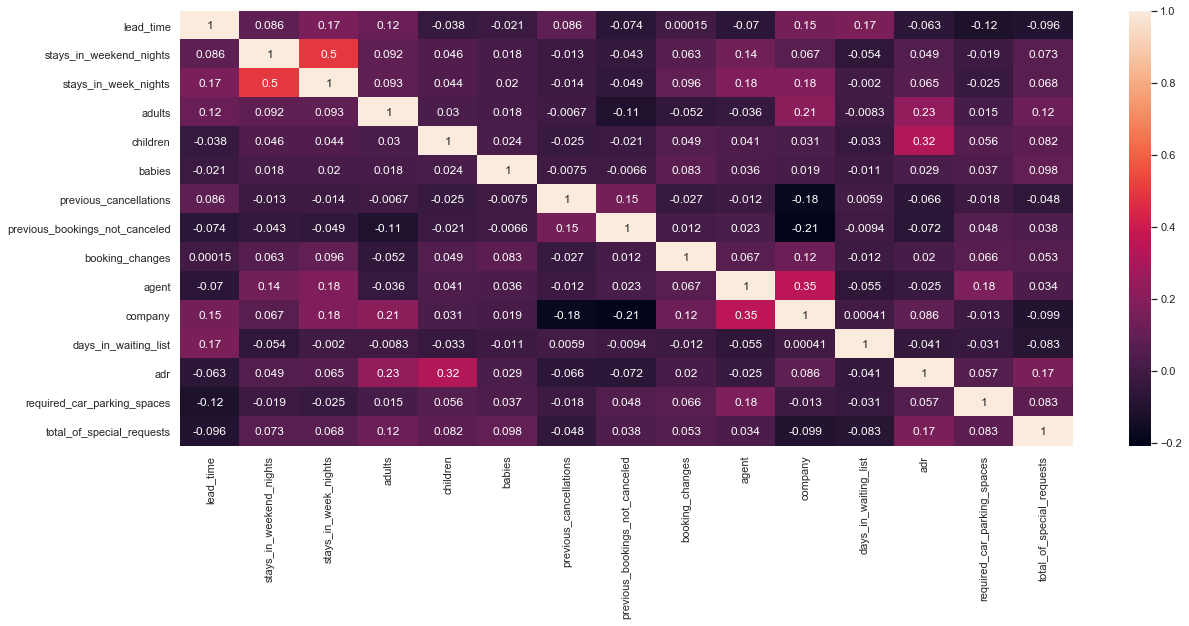

In [249]:
plt.figure(figsize=(20, 8))
sns.heatmap(cat_raw_data.corr(), annot=True)

In [250]:
raw_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_date_year_cat,arrival_date_month_cat,arrival_date_week_number_cat,arrival_date_day_of_month_cat,country_cat,market_segment_cat,distribution_channel_cat,deposit_type_cat,meal_cat,hotel_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015,July,27,1,PRT,Direct,Direct,No Deposit,BB,Resort Hotel
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,2015,July,27,1,PRT,Direct,Direct,No Deposit,BB,Resort Hotel
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015,July,27,1,GBR,Direct,Direct,No Deposit,BB,Resort Hotel
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015,July,27,1,GBR,Corporate,Corporate,No Deposit,BB,Resort Hotel
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015,July,27,1,GBR,Online TA,TA/TO,No Deposit,BB,Resort Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,2017,August,35,30,BEL,Offline TA/TO,TA/TO,No Deposit,BB,City Hotel
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,2017,August,35,31,FRA,Online TA,TA/TO,No Deposit,BB,City Hotel
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,2017,August,35,31,DEU,Online TA,TA/TO,No Deposit,BB,City Hotel
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,2017,August,35,31,GBR,Online TA,TA/TO,No Deposit,BB,City Hotel


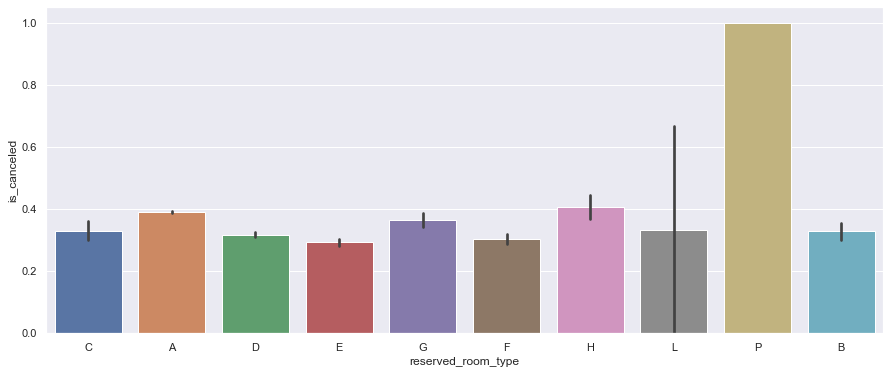

In [251]:
sns.barplot(x=raw_data['reserved_room_type'],y=raw_data['is_canceled'])

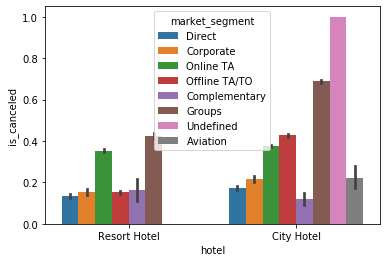

In [227]:
sns.barplot(x=raw_data['hotel'],y=raw_data['is_canceled'], hue=raw_data['market_segment'])

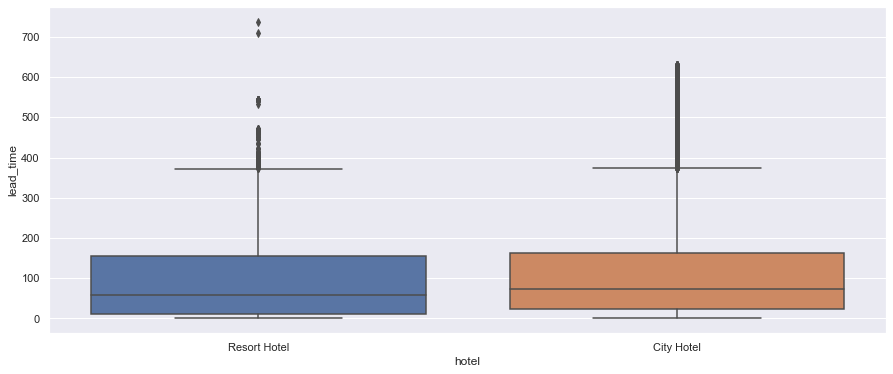

In [233]:
sns.boxplot(x=raw_data['hotel'], y=raw_data['lead_time'])

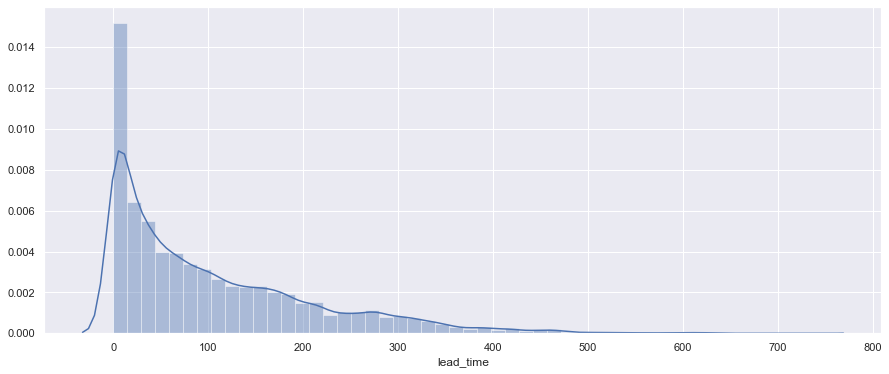

In [234]:
sns.distplot(raw_data['lead_time'])

In [226]:
raw_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,meal_cat,country_cat,market_segment_cat,distribution_channel_cat,is_repeated_guest_cat,reserved_room_type_cat,assigned_room_type_cat,agent_cat,deposit_type_cat,hotel_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,BB,PRT,Direct,Direct,0,C,C,NaN,No Deposit,Resort Hotel
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,BB,PRT,Direct,Direct,0,C,C,NaN,No Deposit,Resort Hotel
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,BB,GBR,Direct,Direct,0,A,C,NaN,No Deposit,Resort Hotel
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,BB,GBR,Corporate,Corporate,0,A,A,304.0,No Deposit,Resort Hotel
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,BB,GBR,Online TA,TA/TO,0,A,A,240.0,No Deposit,Resort Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,BB,BEL,Offline TA/TO,TA/TO,0,A,A,394.0,No Deposit,City Hotel
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,BB,FRA,Online TA,TA/TO,0,E,E,9.0,No Deposit,City Hotel
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,BB,DEU,Online TA,TA/TO,0,D,D,9.0,No Deposit,City Hotel
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,BB,GBR,Online TA,TA/TO,0,A,A,89.0,No Deposit,City Hotel


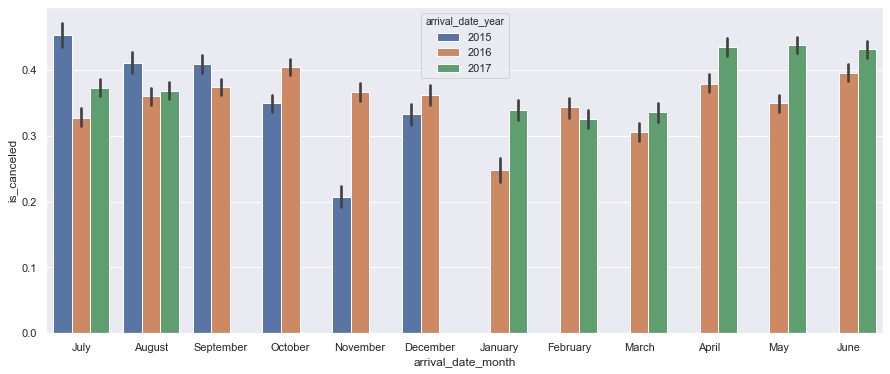

In [232]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x=raw_data['arrival_date_month'], y=raw_data['is_canceled'], hue=raw_data['arrival_date_year'])


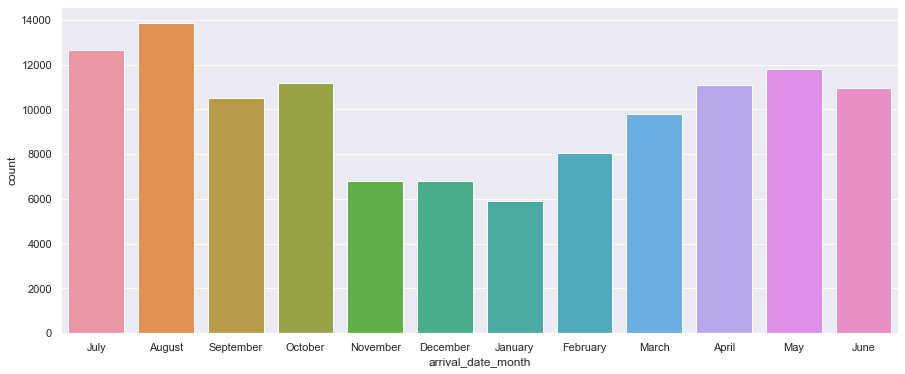

In [354]:
sns.countplot(x=raw_data['arrival_date_month'])

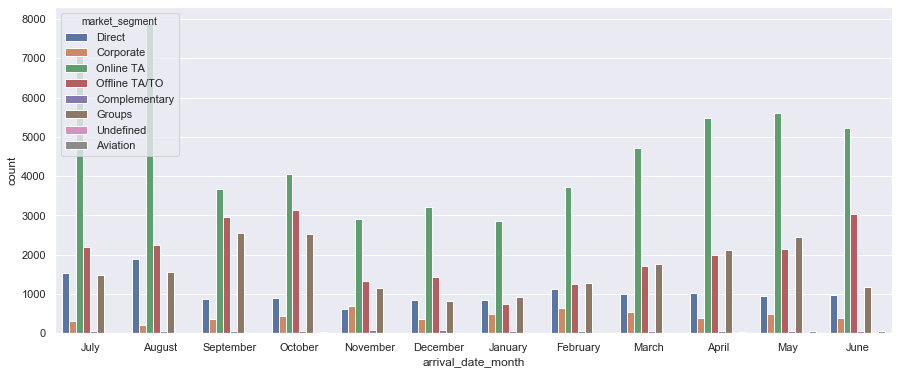

In [238]:
sns.countplot(x=raw_data['arrival_date_month'], hue=raw_data['market_segment'])

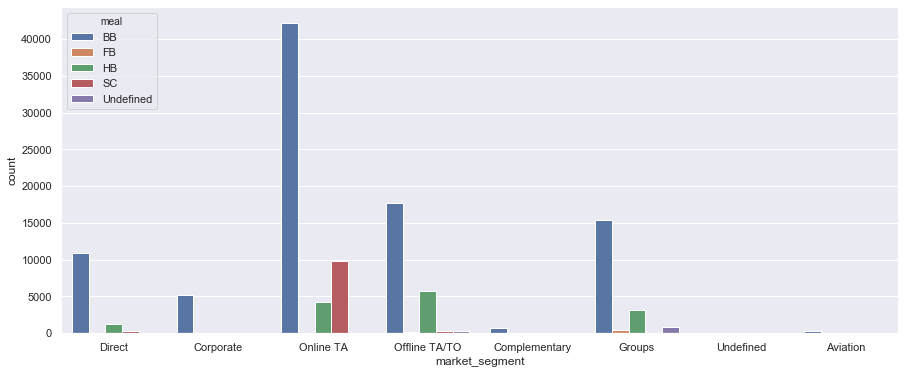

In [241]:
sns.countplot(x=raw_data['market_segment'], hue=raw_data['meal'])

Some variables we can't impute, e.g. company_cat, agent_cat. Some variables brings risk of overfitting by creating large ammout of dummy variables. 
We will drop them and performance of model, it it'll be insufficient we will consider add them back 

In [322]:
cat_raw_dropped = cat_raw_data.drop(['children','reservation_status_cat','company_cat','date','agent_cat','arrival_date_day_of_month_cat','country_cat','arrival_date_year_cat','arrival_date_month_cat','arrival_date_week_number_cat','arrival_date_week_number_cat'],axis=1)
dummies = pd.get_dummies(cat_raw_dropped)
dummies.dtypes

lead_time                  int64
stays_in_weekend_nights    int64
stays_in_week_nights       int64
adults                     int64
babies                     int64
                           ...  
meal_cat_HB                uint8
meal_cat_SC                uint8
meal_cat_Undefined         uint8
hotel_cat_City Hotel       uint8
hotel_cat_Resort Hotel     uint8
Length: 69, dtype: object

In [318]:
dummies.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reserved_room_type_cat_A',
       'reserved_room_type_cat_B', 'reserved_room_type_cat_C',
       'reserved_room_type_cat_D', 'reserved_room_type_cat_E',
       'reserved_room_type_cat_F', 'reserved_room_type_cat_G',
       'reserved_room_type_cat_H', 'reserved_room_type_cat_L',
       'reserved_room_type_cat_P', 'Hotel_cat_City Hotel',
       'Hotel_cat_Resort Hotel', 'is_canceled_cat_0', 'is_canceled_cat_1',
       'is_repeated_guest_cat_0', 'is_repeated_guest_cat_1',
       'assigned_room_type_cat_A', 'assigned_room_type_cat_B',
       'assigned_room_type_cat_C', 'assigned_room_type_cat_D',
       'assigned_room_type_cat_E', 'assigned_room_type_cat_F',
       'assigned_room_type_

In [330]:
X = dummies.drop(['company','agent','is_canceled_cat_1','is_canceled_cat_0'], axis=1)
y=dummies['is_canceled_cat_0']

We will use <strong>Random Forest</strong> model, to classify if reservation was canceled or not.
To be more precisy, we will use 149 models and we will choose best performing one

In [339]:
accuracy_list = []
n_estimators_list = []
i=1
for i in range(1,150):
    n_estimators_list.append(i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy:"+str(metrics.accuracy_score(y_test, y_pred))+" N_estimators:"+str(i))


Accuracy:0.8058184660915207 N_estimators:1
Accuracy:0.7838177401792444 N_estimators:2
Accuracy:0.8319233883351481 N_estimators:3
Accuracy:0.8269816009157662 N_estimators:4
Accuracy:0.8357483876371555 N_estimators:5
Accuracy:0.8363905408046458 N_estimators:6
Accuracy:0.8442359773292012 N_estimators:7
Accuracy:0.8432867074294329 N_estimators:8
Accuracy:0.8473629840578496 N_estimators:9
Accuracy:0.848786888907502 N_estimators:10
Accuracy:0.8536169975151464 N_estimators:11
Accuracy:0.8465812323756875 N_estimators:12
Accuracy:0.8522489320713628 N_estimators:13
Accuracy:0.8459390792081972 N_estimators:14
Accuracy:0.8505179104894324 N_estimators:15
Accuracy:0.8509087863305135 N_estimators:16
Accuracy:0.8526118882095095 N_estimators:17
Accuracy:0.8496244799955328 N_estimators:18
Accuracy:0.850797107518776 N_estimators:19
Accuracy:0.8540078733562275 N_estimators:20
Accuracy:0.8534215595946059 N_estimators:21
Accuracy:0.8522768517742971 N_estimators:22
Accuracy:0.8537565960298182 N_estimators:23

Checking ROC and accuracy

Accuracy: 0.8572465588966134


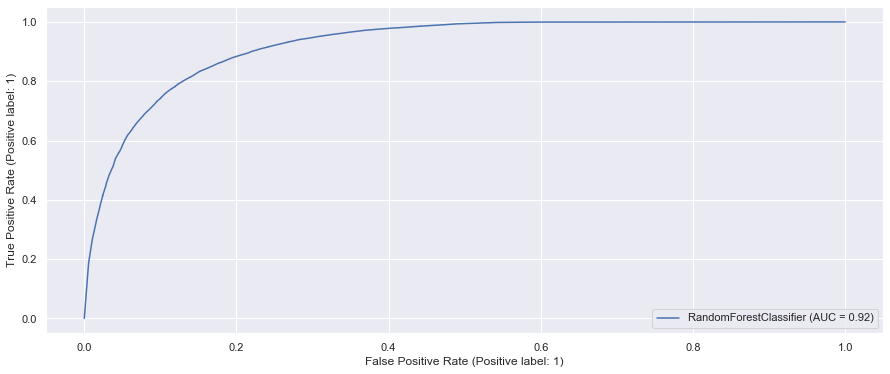

In [335]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

Let's check best performing model

In [348]:
trees_df = pd.DataFrame(zip(accuracy_list,n_estimators_list), columns=['Accuracy','No of trees'])

In [349]:
trees_df

,Accuracy,No of trees
0,0.805818,1
1,0.783818,2
2,0.831923,3
3,0.826982,4
4,0.835748,5
...,...,...
144,0.858894,145
145,0.856269,146
146,0.856967,147
147,0.857051,148


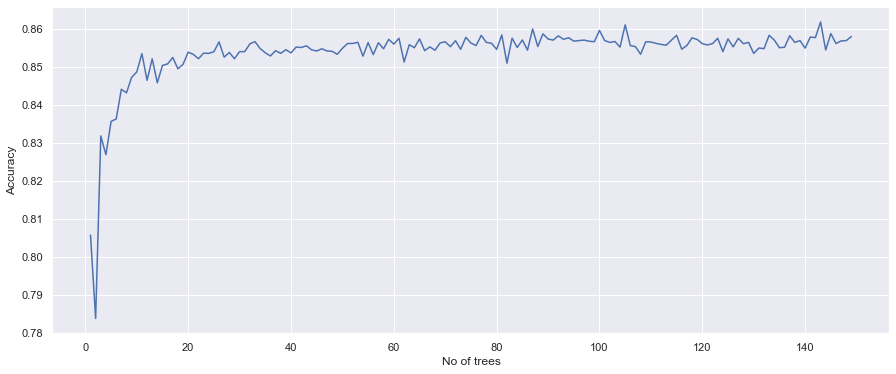

In [351]:
sns.lineplot(x=trees_df['No of trees'], y=trees_df['Accuracy'])

In [352]:
trees_df[trees_df['Accuracy']==trees_df['Accuracy'].max()]

,Accuracy,No of trees
142,0.861965,143


For our purpose 0.861965 accuracy looks good.